# Analisi dati delle zone gialle degli ultimi 14 giorni disponibili
I dati elaborati sono quelli presenti nel file * dpc-covid19-ita-regioni.json * nella directory * dati-json *.

**Elaborazione dei dati:**
* estrazione del dataset
* trovo la data massima contenuta nel dataset
* calcolo la data di riferimento per trovare i dati dei 14 giorni precedenti
* estraggo dei sotto dataset con i dati delle regioni rilevati per l'analisi in questione relativi al periodo temporale in esame

In [1]:
import pandas as pd 
pd.plotting.register_matplotlib_converters()

dataset = pd.read_json('../dati-json/dpc-covid19-ita-regioni.json')
dataset['data'] = pd.to_datetime(dataset['data'])
dataset.set_index('data', inplace=True)

max_date = dataset.index.max()

In [2]:
from datetime import timedelta

ref_date = max_date - timedelta(days=14)

In [3]:
regioni = ['Lazio', 'Molise', 'P.A. Trento', 'Sardegna', 'Veneto']

data_filter = (dataset.index > ref_date) & (dataset.denominazione_regione.isin(regioni))
filtered_set = dataset[data_filter].loc[:, ['denominazione_regione', 'ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'totale_positivi', 'variazione_totale_positivi', 'nuovi_positivi', 'dimessi_guariti', 'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening', 'totale_casi', 'tamponi', 'casi_testati']]

In [4]:
subsets = []
for r in regioni:
    subsets.append((r, filtered_set[filtered_set.denominazione_regione == r].sort_index()))

Configurazione preferenze di base per i grafici.

In [5]:
import matplotlib.pyplot as plt 

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)
default_figsize = (24, 6)
default_titlesize = 20
default_padding = 8

## Andamento ricoverati con sintomi

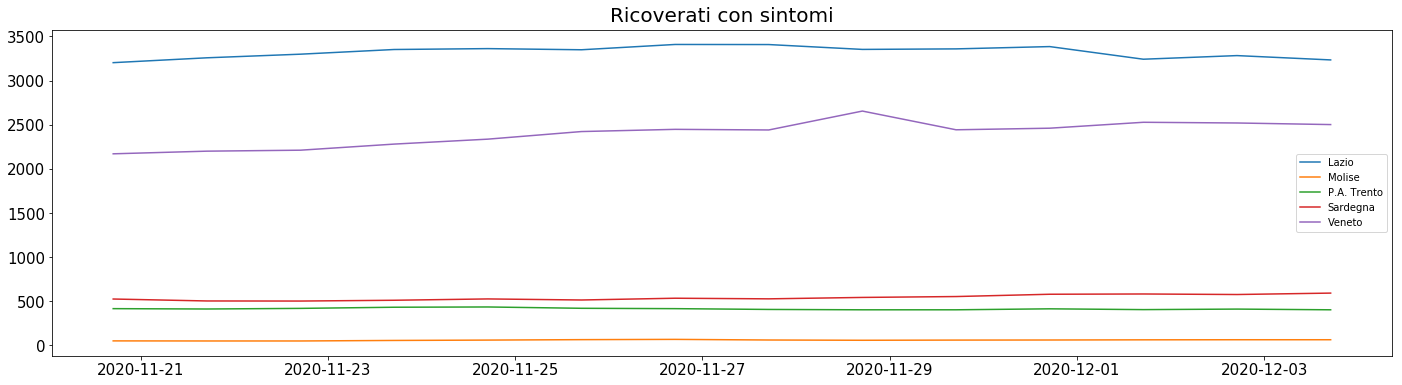

In [6]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['ricoverati_con_sintomi'].values, label=r)
plt.title('Ricoverati con sintomi', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento occupazione delle terapie intensive

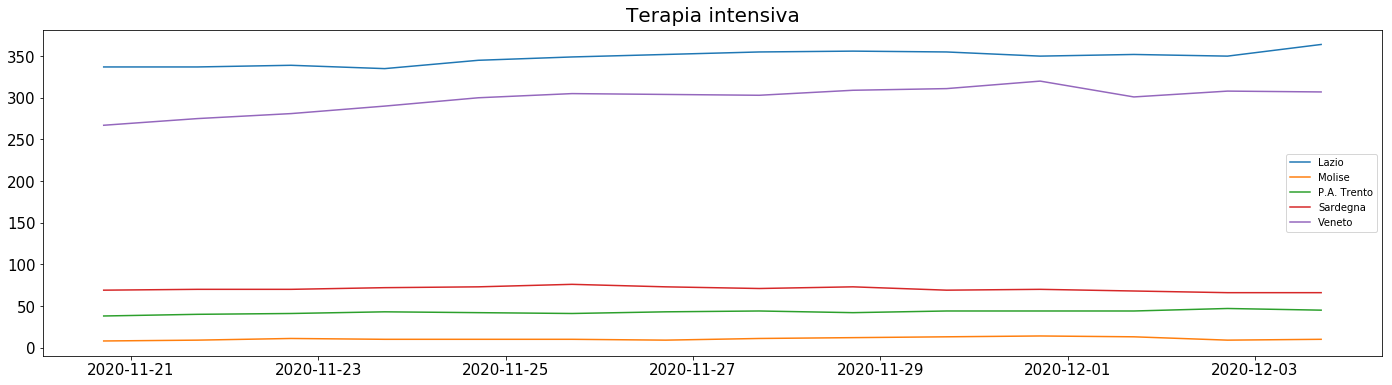

In [7]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['terapia_intensiva'].values, label=r)
plt.title('Terapia intensiva', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento totale dei pazienti ospedalizzati

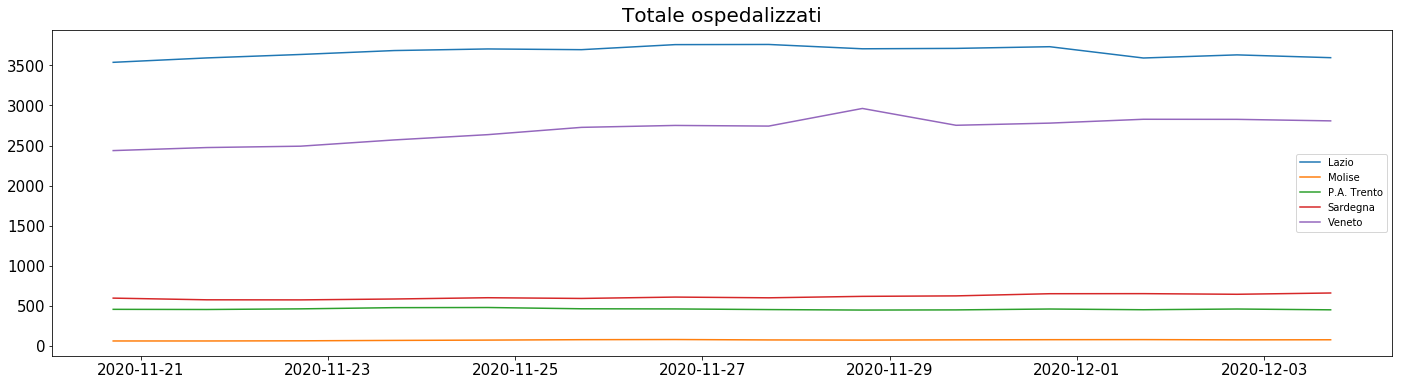

In [8]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['totale_ospedalizzati'].values, label=r)
plt.title('Totale ospedalizzati', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento persone in isolamento domiciliare

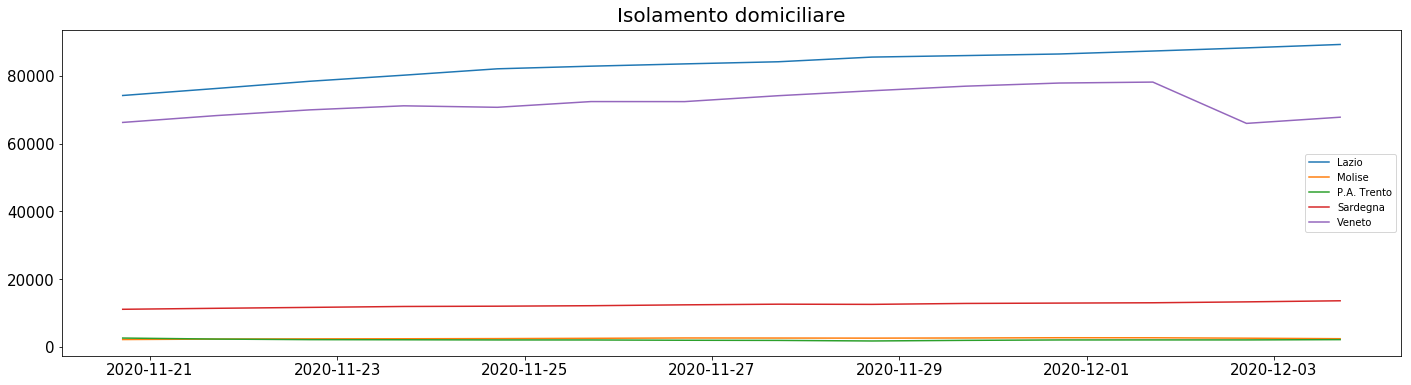

In [9]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['isolamento_domiciliare'].values, label=r)
plt.title('Isolamento domiciliare', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento totale attualmente positivi
Calcolati con la formula: $ totale\_ospedalizzati + isolamento\_domiciliare $

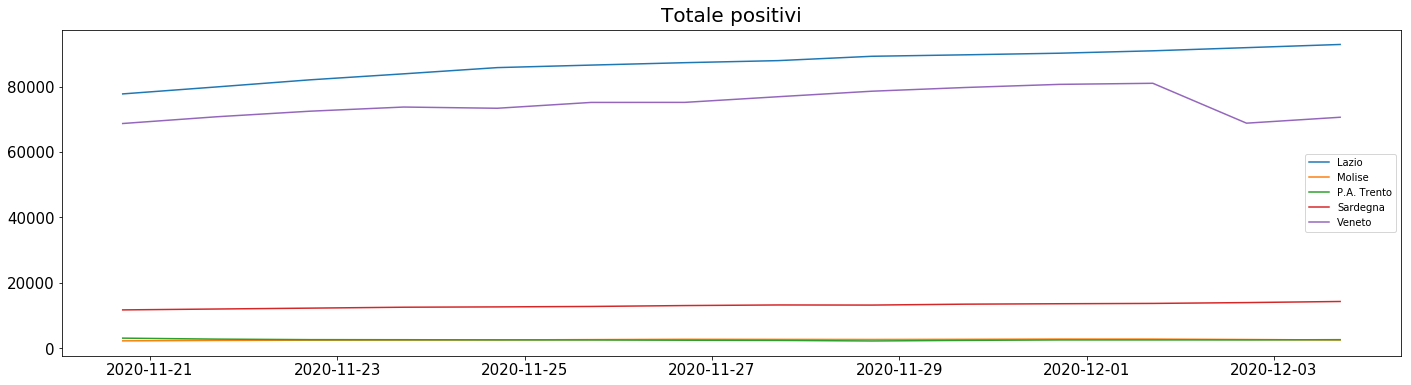

In [10]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['totale_positivi'].values, label=r)
plt.title('Totale positivi', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento della variazione totale positivi
Calcolati con la formula: $ totale\_positivi\ giorno\ corrente - totale\_positivi\ giorno\ precedente $

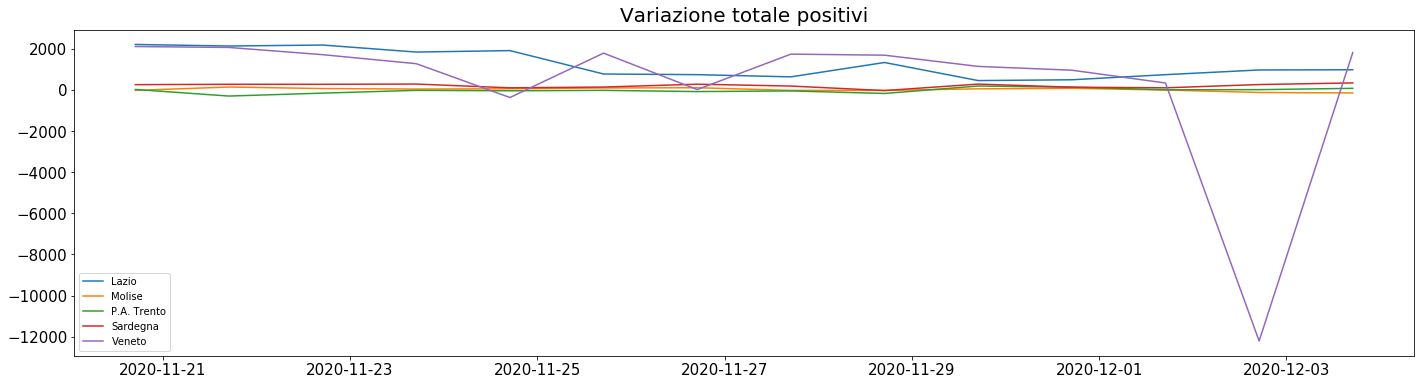

In [11]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['variazione_totale_positivi'].values, label=r)
plt.title('Variazione totale positivi', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento nuovi positivi
Calcolati con la formula: $ totale\_casi\ giorno\ corrente - totale\_casi\ giorno\ precedente $

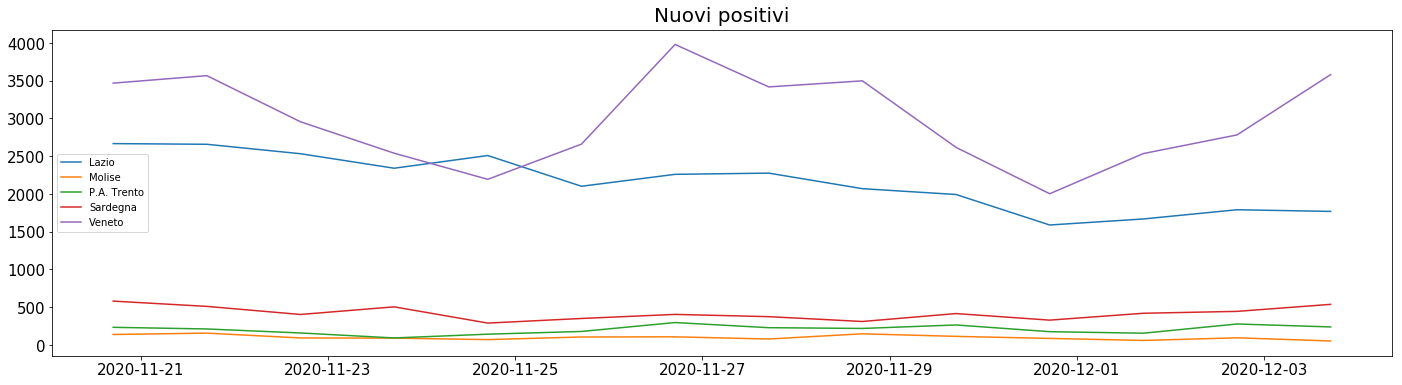

In [12]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['nuovi_positivi'].values, label=r)
plt.title('Nuovi positivi', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento dimessi guariti

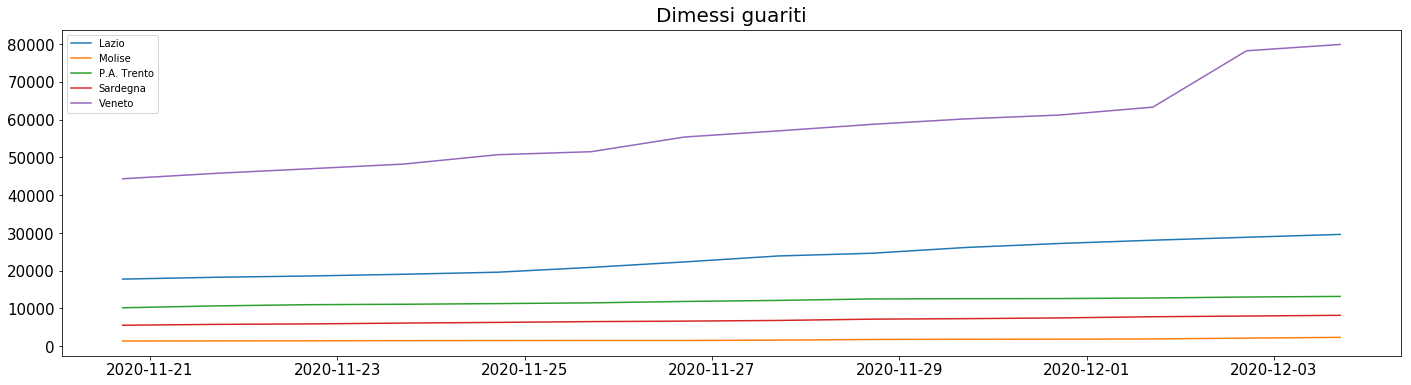

In [13]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['dimessi_guariti'].values, label=r)
plt.title('Dimessi guariti', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento deceduti
Il dato è cumulativo.

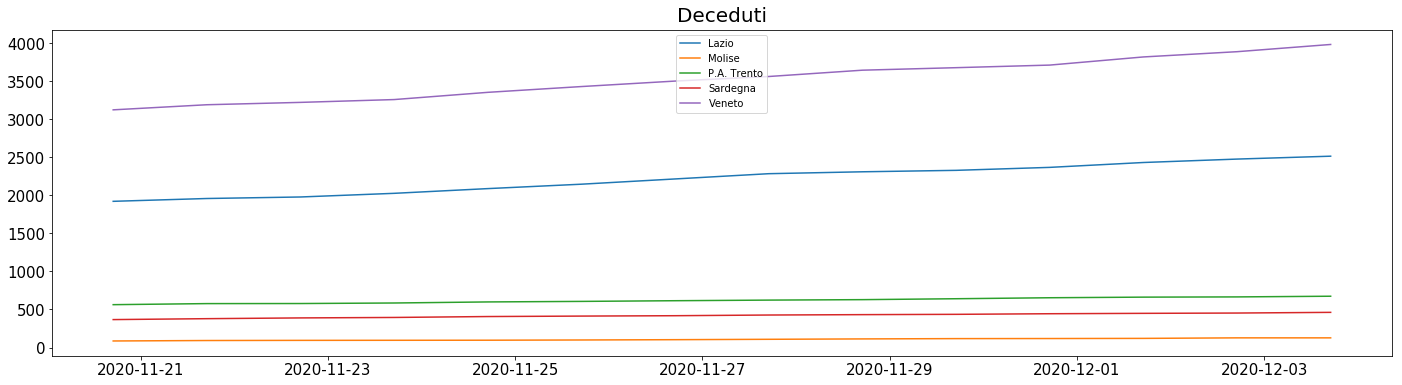

In [14]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['deceduti'].values, label=r)
plt.title('Deceduti', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Casi da sospetto diagnostico

Casi positivi al tampone emersi da attività clinica.

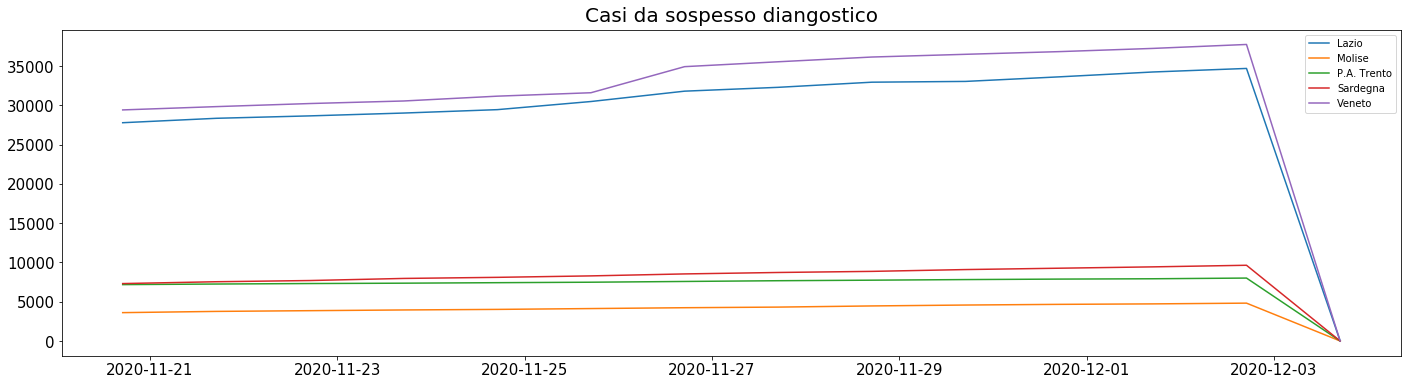

In [15]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['casi_da_sospetto_diagnostico'].values, label=r)
plt.title('Casi da sospesso diangostico', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Casi da screening

Casi positivi emersi da indagini e test, pianificati a livello nazionale o regionale.

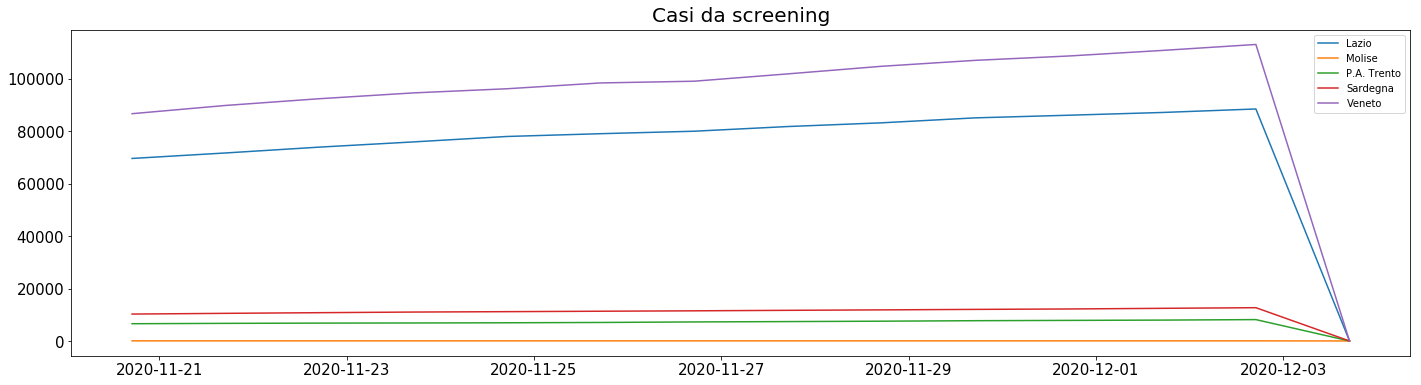

In [16]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['casi_da_screening'].values, label=r)
plt.title('Casi da screening', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento totale casi

Totale casi positivi.

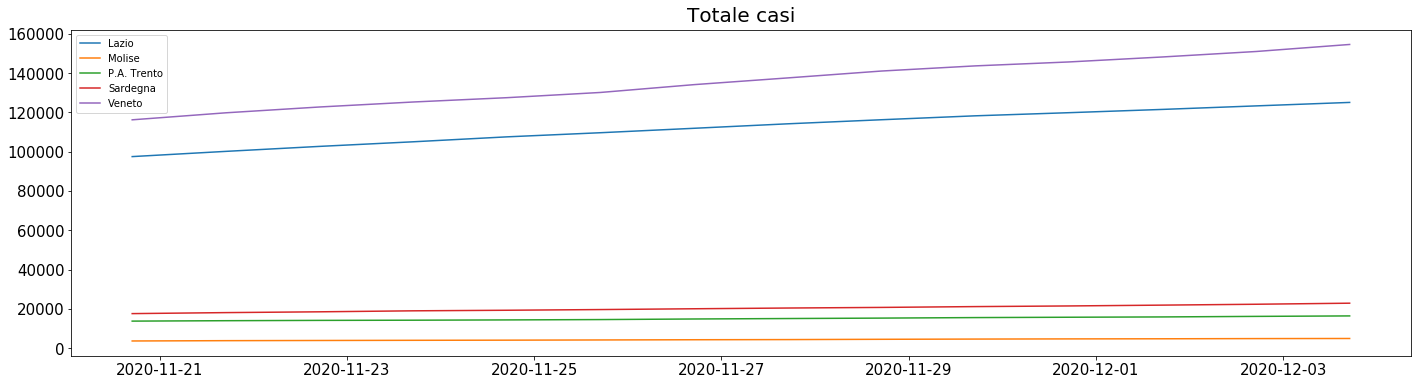

In [17]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['totale_casi'].values, label=r)
plt.title('Totale casi', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento tamponi

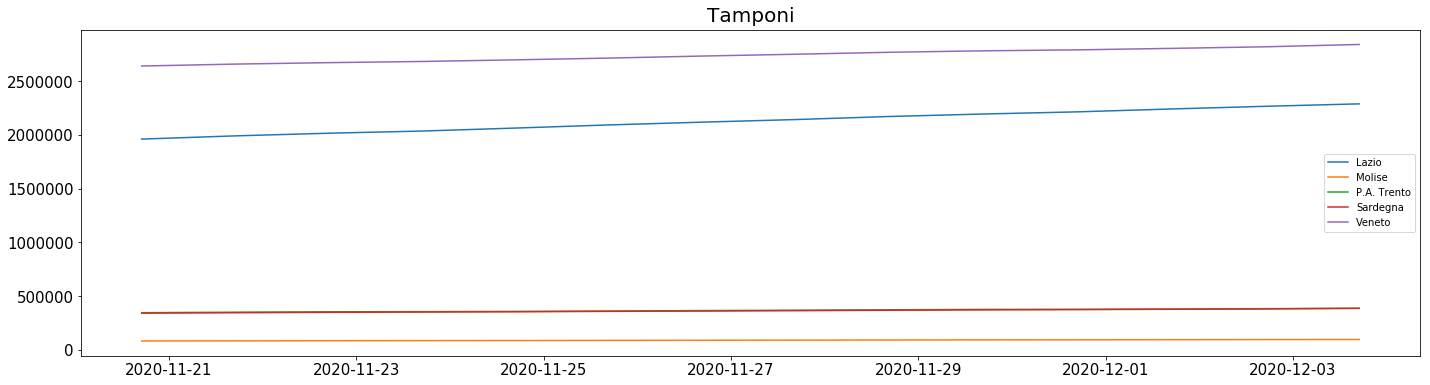

In [18]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['tamponi'].values, label=r)
plt.title('Tamponi', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Andamento casi testati

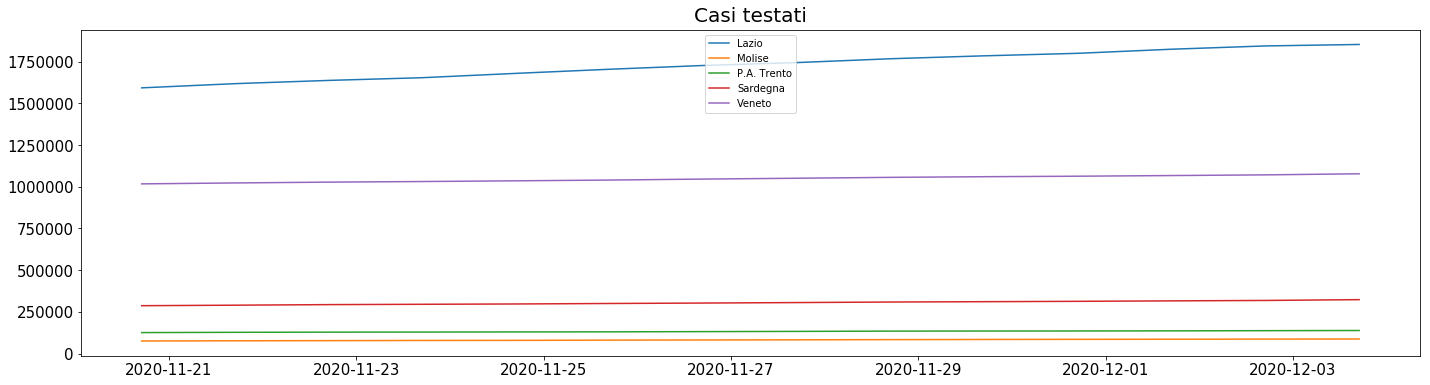

In [19]:
plt.figure(figsize=default_figsize)
for (r, s) in subsets:
    plt.plot(s.index, s['casi_testati'].values, label=r)
plt.title('Casi testati', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Analisi variazione dei dati forniti in modo cumulativo

In [20]:
diff_col = ['ricoverati_con_sintomi', 'terapia_intensiva', 'totale_ospedalizzati', 'isolamento_domiciliare', 'dimessi_guariti', 'deceduti', 'casi_da_sospetto_diagnostico', 'casi_da_screening', 'tamponi', 'casi_testati']
diff_subsets = []
for (r, s) in subsets:
    diff_subsets.append((r, s.loc[:, diff_col].diff()))

## Variazione ricoverati con sintomi
Calcolata con la formula: $ ricoverati\_con\_sintomi\ giorno\ X - ricoverati\_con\_sintomi\ giorno\ X-1 $

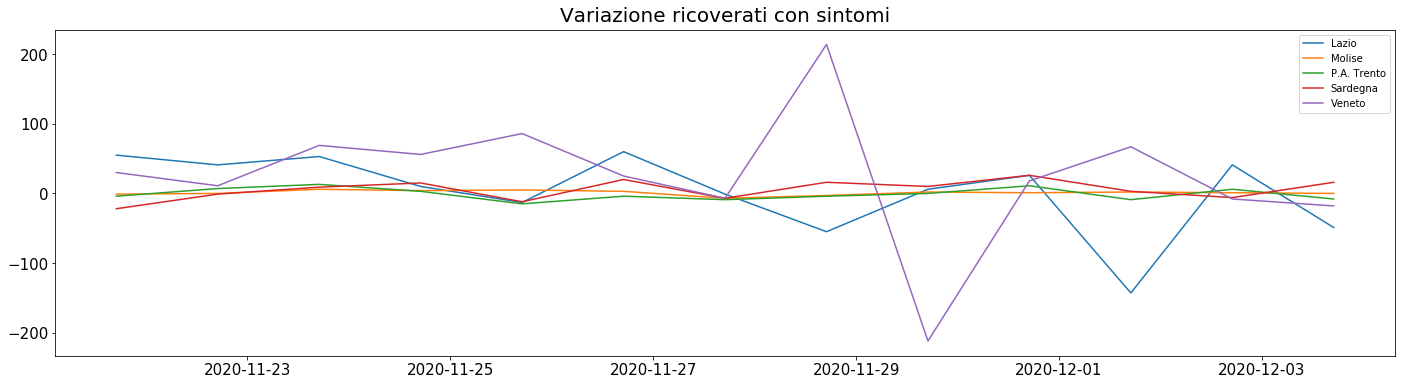

In [21]:
plt.figure(figsize=default_figsize)
for (r, s) in diff_subsets:
    plt.plot(s.index, s['ricoverati_con_sintomi'].values, label=r)
plt.title('Variazione ricoverati con sintomi', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Variazione terapie intensive
Calcolata con la formula: $ terapia\_intensiva\ giorno\ X - terapia\_intensiva\ giorno\ X-1 $

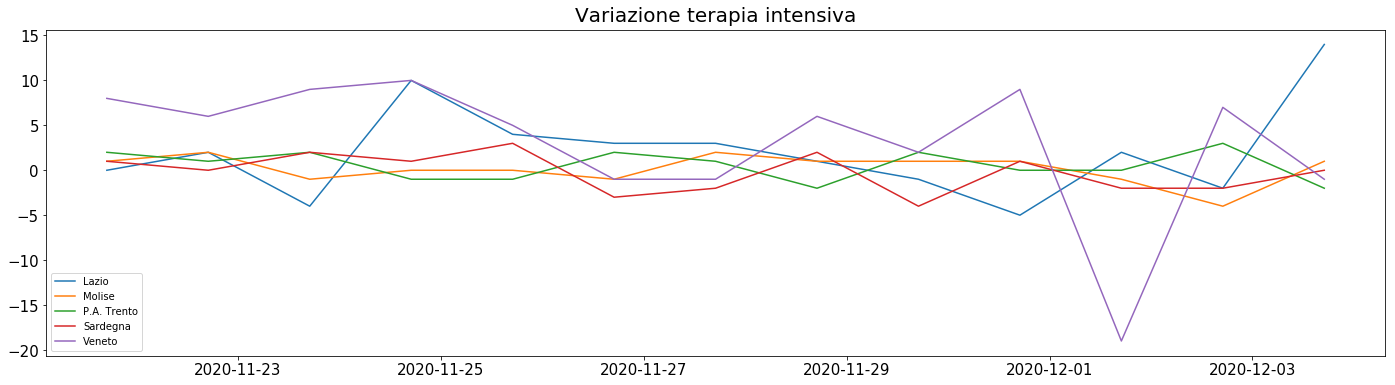

In [22]:
plt.figure(figsize=default_figsize)
for (r, s) in diff_subsets:
    plt.plot(s.index, s['terapia_intensiva'].values, label=r)
plt.title('Variazione terapia intensiva', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Variazione totale ospedalizzati
Calcolata con la formula: $ totale\_ospedalizzati\ giorno\ X - totale\_ospedalizzati\ giorno\ X-1 $

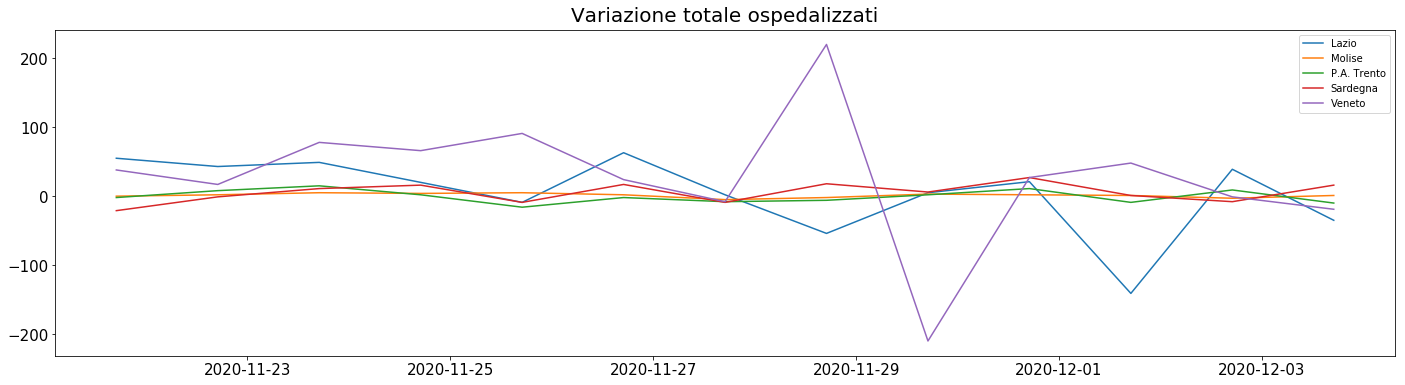

In [23]:
plt.figure(figsize=default_figsize)
for (r, s) in diff_subsets:
    plt.plot(s.index, s['totale_ospedalizzati'].values, label=r)
plt.title('Variazione totale ospedalizzati', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Variazione deceduti
Calcolata con la formula: $ deceduti\ giorno\ X - deceduti\ giorno\ X-1 $

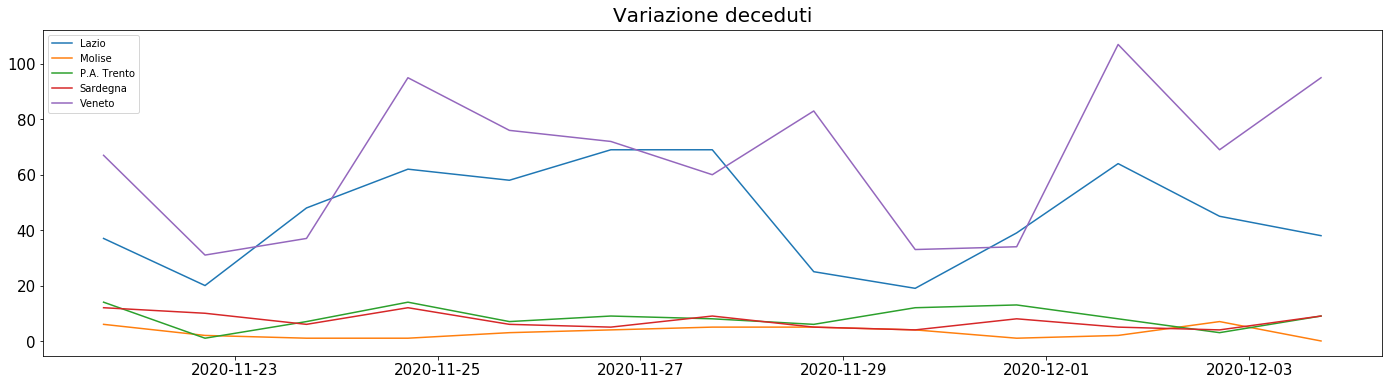

In [24]:
plt.figure(figsize=default_figsize)
for (r, s) in diff_subsets:
    plt.plot(s.index, s['deceduti'].values, label=r)
plt.title('Variazione deceduti', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()

## Variazione tamponi
Calcolata con la formula: $ tamponi\ giorno\ X - tamponi\ giorno\ X-1 $

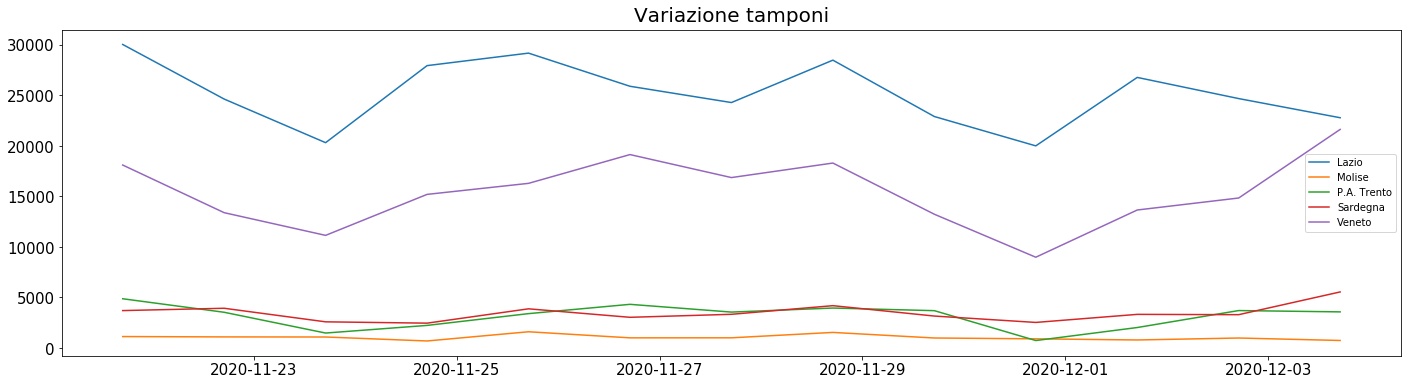

In [25]:
plt.figure(figsize=default_figsize)
for (r, s) in diff_subsets:
    plt.plot(s.index, s['tamponi'].values, label=r)
plt.title('Variazione tamponi', fontsize=default_titlesize, pad=default_padding)
plt.legend()
plt.show()